In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load the data
df1 = pd.read_csv('Twitter_training.csv')
df2 = pd.read_csv('Twitter_validation.csv')

In [3]:
#Naming columns and concatenating two dataframes for analysis
column_name=['tweetID','entity','sentiment','tweet_content']
df1.columns=column_name
df2.columns=column_name
df3=pd.concat([df1,df2],ignore_index=False)
df3.head()

,tweetID,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75680 entries, 0 to 998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweetID        75680 non-null  int64 
 1   entity         75680 non-null  object
 2   sentiment      75680 non-null  object
 3   tweet_content  74994 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [5]:
#checking null values
df3.isnull().sum()

tweetID            0
entity             0
sentiment          0
tweet_content    686
dtype: int64

In [6]:
#checking duplicate values
df3.duplicated().sum()

3217

In [7]:
#Remove null & duplicate values
df3.dropna(inplace=True)
df3.drop_duplicates(inplace=True)
print("null values:","\n",df3.isnull().sum())
print("duplicated values:",df3.duplicated().sum())

null values: 
 tweetID          0
entity           0
sentiment        0
tweet_content    0
dtype: int64
duplicated values: 0


In [8]:
#Dropping unnecessary columns:
df3.drop(columns=['tweetID','tweet_content'],inplace=True)
df3.head()

,entity,sentiment
0,Borderlands,Positive
1,Borderlands,Positive
2,Borderlands,Positive
3,Borderlands,Positive
4,Borderlands,Positive


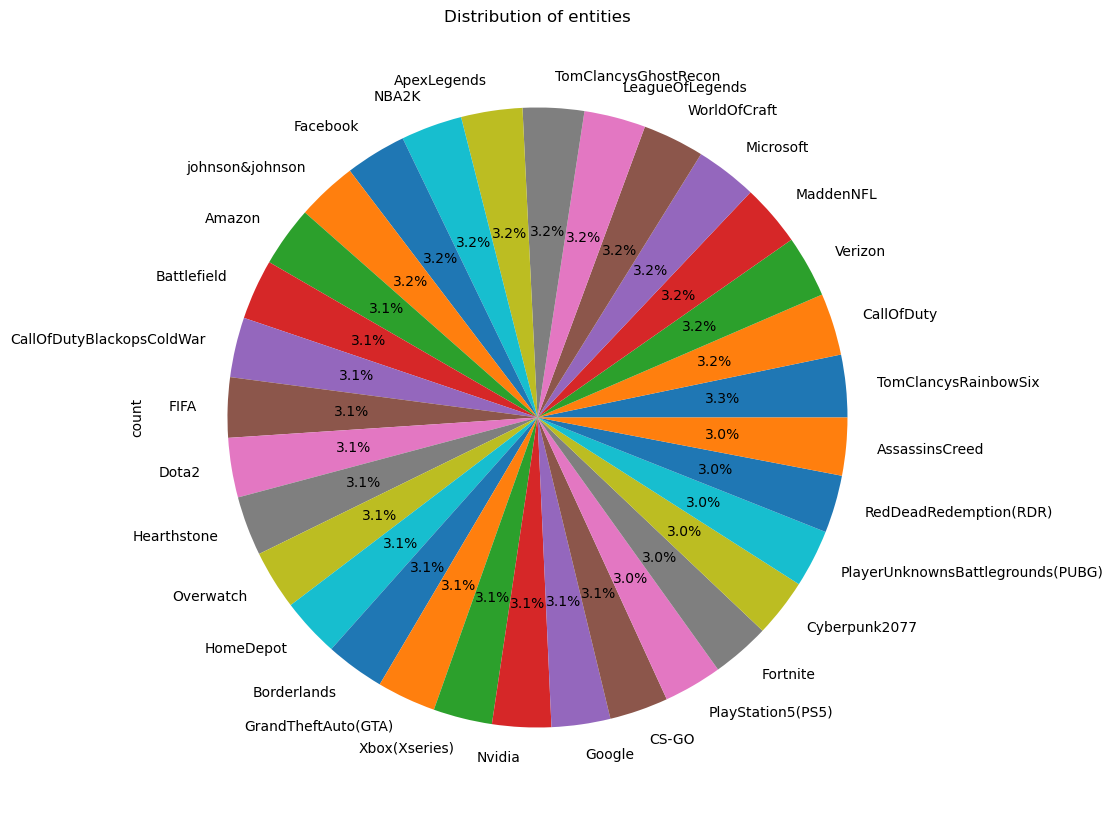

In [9]:
#Pie chart of distribution of entities
entity_content=df3['entity'].value_counts()
entity_content.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 12))
plt.title('Distribution of entities')

plt.show()

<Axes: xlabel='sentiment'>

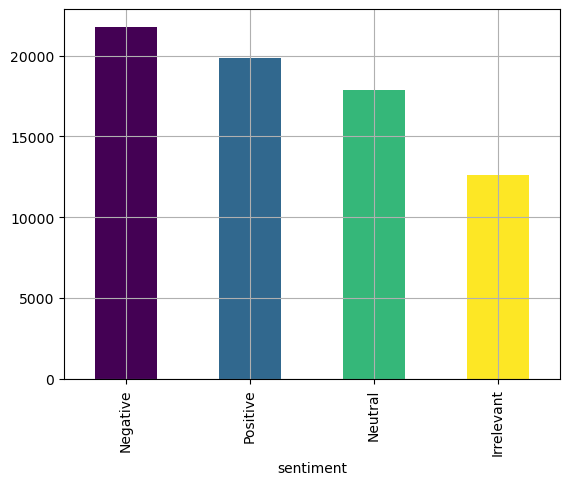

In [10]:
sentiment_content=df3['sentiment'].value_counts()
color=plt.get_cmap('viridis')
colors = [color(i) for i in np.linspace(0, 1, len(sentiment_content))]
sentiment_content.plot(kind='bar',color=colors,grid=True)

<Axes: xlabel='entity'>

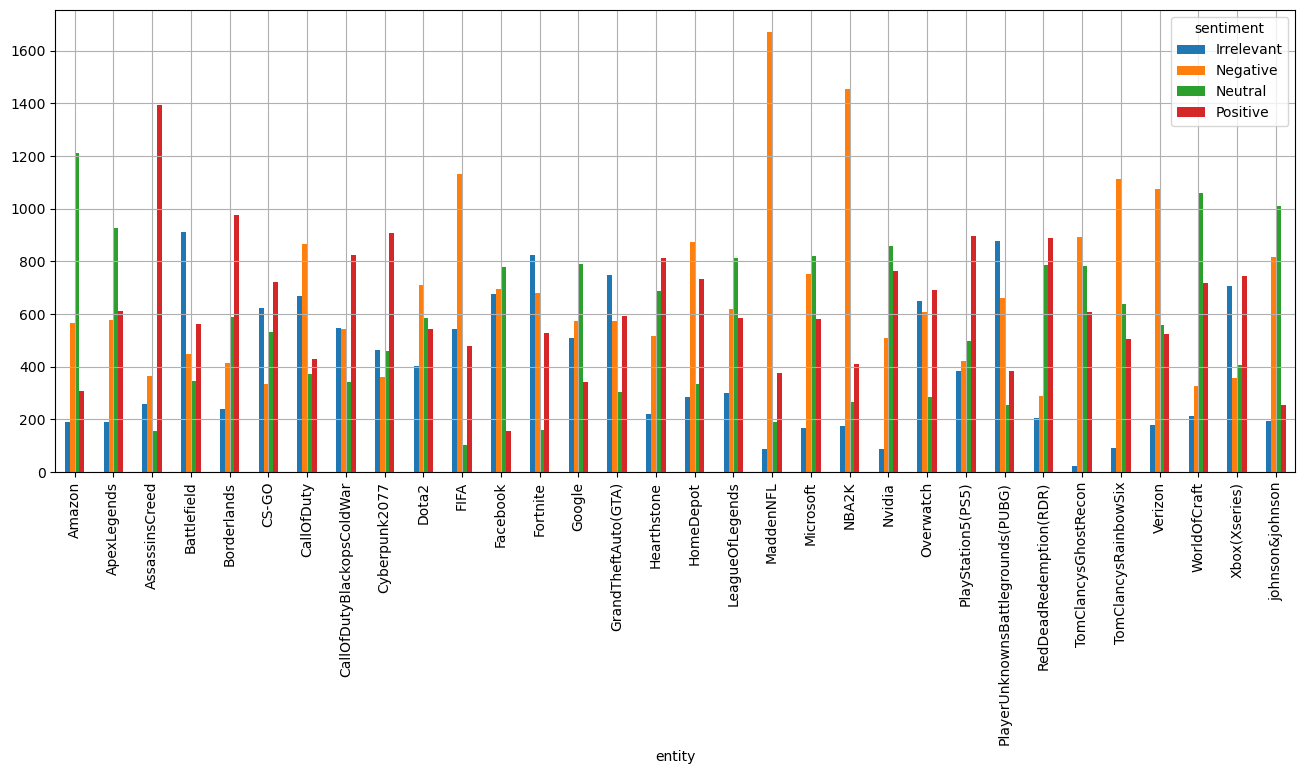

In [11]:
reactions_entities = pd.crosstab(df3['entity'],df3['sentiment'])
reactions_entities.plot(kind='bar', figsize=(16, 6),grid=True)